In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

print(trainset, testset)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

print(trainset)
# print(type(trainloader))

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


for xb, yb in trainset:
  print(xb.shape)
  print(yb)
  break

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           ) Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
torch.Size([3, 32, 32])
6


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img * 0.5 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

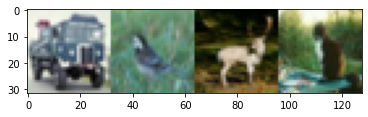

truck bird deer cat


In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=4, padding=0))
print(" ".join(classes[labels[j]] for j in range(4)))

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return (self.fc3(x))


net = Net()
print(net)



Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [16]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for data in trainloader:
  inputs, labels = data
  outputs = net(inputs)
  print(outputs.data.shape)
  break

torch.Size([4, 10])


In [13]:
for epoch in range(5):
  running_loss = 0.0

  for i, data in enumerate(trainloader):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.208
[1,  4000] loss: 1.975
[1,  6000] loss: 1.731
[1,  8000] loss: 1.597
[1, 10000] loss: 1.543
[1, 12000] loss: 1.489
[2,  2000] loss: 1.405
[2,  4000] loss: 1.380
[2,  6000] loss: 1.348
[2,  8000] loss: 1.334
[2, 10000] loss: 1.282
[2, 12000] loss: 1.277
[3,  2000] loss: 1.224
[3,  4000] loss: 1.217
[3,  6000] loss: 1.218
[3,  8000] loss: 1.193
[3, 10000] loss: 1.187
[3, 12000] loss: 1.177
[4,  2000] loss: 1.098
[4,  4000] loss: 1.113
[4,  6000] loss: 1.090
[4,  8000] loss: 1.126
[4, 10000] loss: 1.112
[4, 12000] loss: 1.100
[5,  2000] loss: 1.022
[5,  4000] loss: 1.034
[5,  6000] loss: 1.032
[5,  8000] loss: 1.057
[5, 10000] loss: 1.054
[5, 12000] loss: 1.035
Finished Training


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 81 %
Accuracy of  bird : 39 %
Accuracy of   cat : 52 %
Accuracy of  deer : 57 %
Accuracy of   dog : 36 %
Accuracy of  frog : 69 %
Accuracy of horse : 63 %
Accuracy of  ship : 80 %
Accuracy of truck : 62 %
